In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [33]:
# Load the dataset
heart_disease = pd.read_excel("C:\\Data science\\Assignments\\heart_disease.xlsx")

# Sheet 2: data
data = pd.read_excel("C:\\Data science\\Assignments\\heart_disease.xlsx", sheet_name='Heart_disease')

In [34]:
# Check column names
print("Corrected Columns in the dataset:")
print(data.columns)

Corrected Columns in the dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [37]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [39]:
# Summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


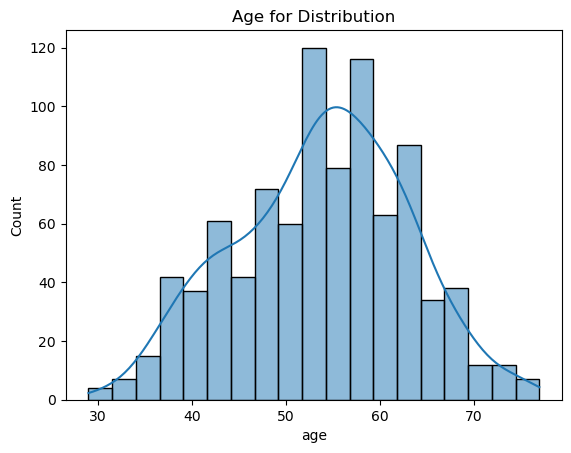

In [41]:
# Visualize distribution of features
# Example histogram for a column like 'age' (make sure the column exists in your data)
sns.histplot(data['age'], kde=True) 
plt.title('Age for Distribution')
plt.show()

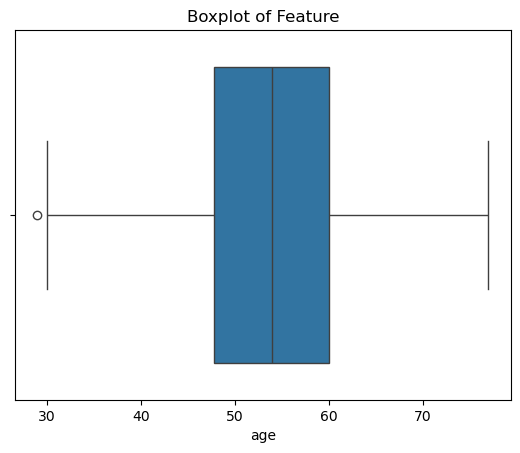

In [43]:
# Example boxplot for outliers in 'age'
sns.boxplot(x=data['age'])  
plt.title('Boxplot of Feature')
plt.show()

In [45]:
# Feature Engineering
# Encoding categorical features if needed (For example: Male, Female)
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})


In [47]:
# Handling missing values (if any)
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

In [49]:
# Handling missing values: 
# For numeric columns, we fill missing values with the mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For categorical columns, we can fill missing values with the mode (most frequent value)
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Convert categorical features using One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_cols)

In [51]:
# Verify there are no more missing values
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
age                         0
sex                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
num                         0
cp_asymptomatic             0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_False                   0
fbs_True                    0
restecg_lv hypertrophy      0
restecg_normal              0
restecg_st-t abnormality    0
exang_False                 0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_downsloping           0
slope_flat                  0
slope_upsloping             0
thal_fixed defect           0
thal_normal                 0
thal_reversable defect      0
dtype: int64


In [53]:
# Split the dataset into training and testing sets (80-20 split)
X = data.drop(columns='num')  # Assuming 'num' is the target column
y = data['num']  # Assuming 'num' is the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Decision Tree Classification
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [57]:
# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.489010989010989

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        89
           1       0.36      0.35      0.36        48
           2       0.33      0.36      0.35        22
           3       0.10      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.30      0.31      0.30       182
weighted avg       0.50      0.49      0.49       182



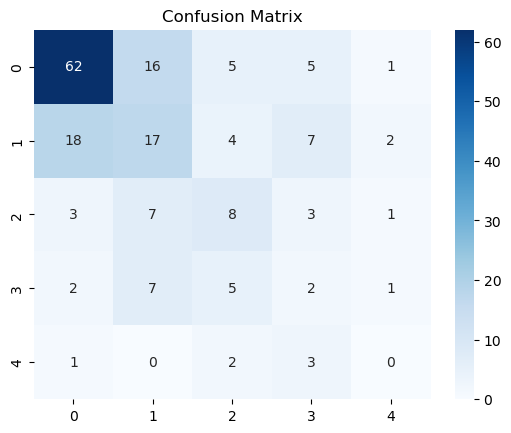

In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# Visualize the Decision Tree
# Determine the unique classes in the target variable
unique_classes = list(map(str, y.unique()))

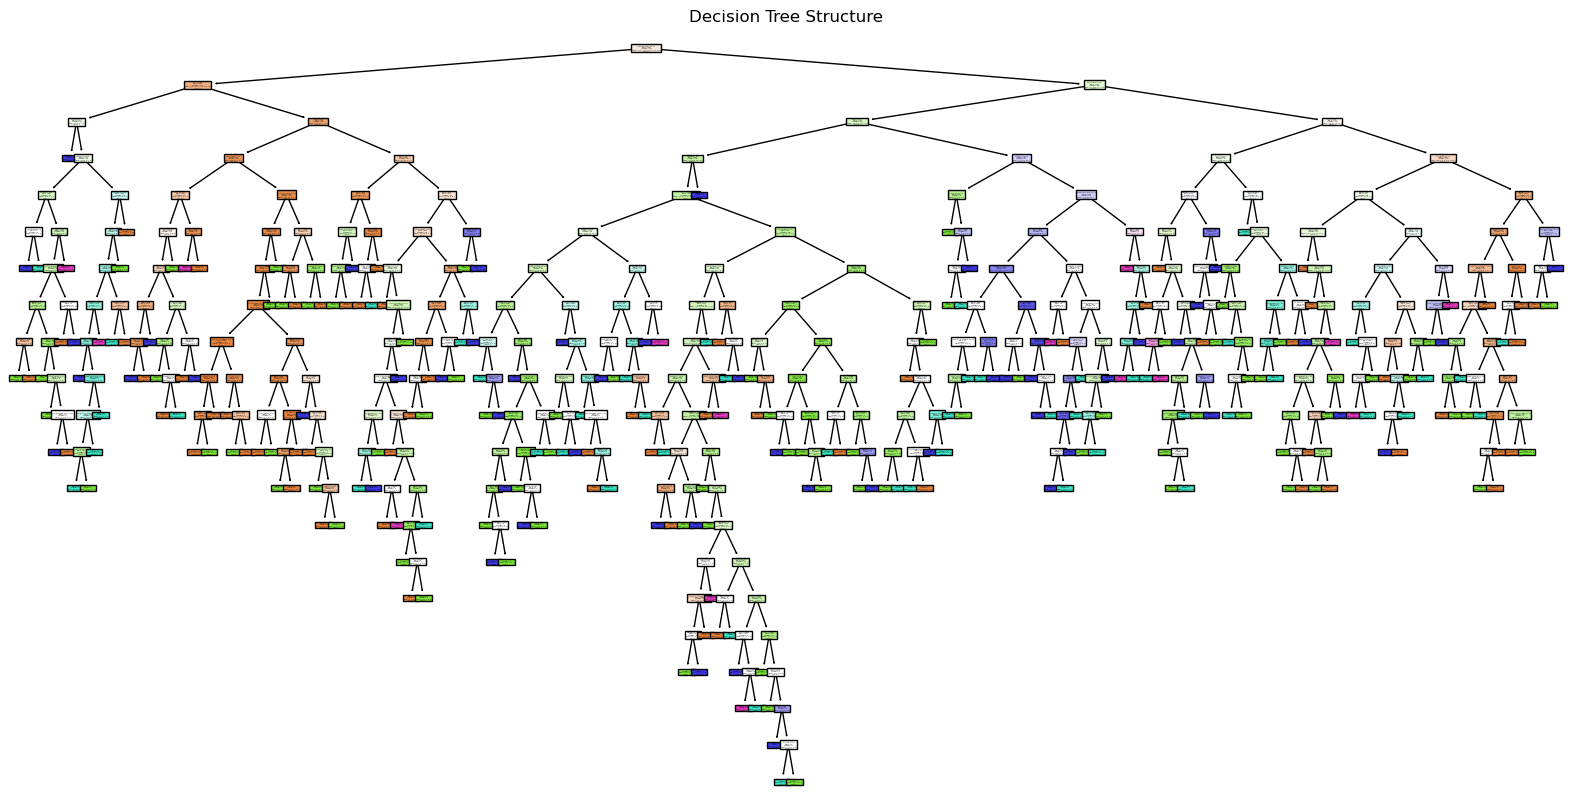

In [67]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=unique_classes)
plt.title('Decision Tree Structure')
plt.show()

In [69]:
# Hyperparameter Tuning (example with GridSearchCV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearch:")
print(grid_search.best_params_)


Best parameters found by GridSearch:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [71]:

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nAccuracy of the tuned model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report of the tuned model:")
print(classification_report(y_test, y_pred_best))


Accuracy of the tuned model: 0.5659340659340659

Classification Report of the tuned model:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        89
           1       0.38      0.52      0.44        48
           2       0.00      0.00      0.00        22
           3       0.14      0.06      0.08        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.25      0.29      0.26       182
weighted avg       0.46      0.57      0.50       182



C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Q1: Common Hyperparameters of Decision Tree Models and Their Impact on Performance

# 1. max_depth
# - Controls the maximum depth of the tree.
# - A deeper tree can model complex relationships but might lead to overfitting.
# - A shallow tree might underfit by not capturing enough complexity.

# 2. min_samples_split
# - Minimum number of samples required to split an internal node.
# - Higher values can reduce overfitting but might cause underfitting if set too high.

# 3. min_samples_leaf
# - Sets the minimum number of samples that a leaf node must have.
# - Larger values can smooth out the model and prevent overfitting by avoiding small splits that capture noise.

# 4. criterion
# - Function used to measure the quality of a split.
# - 'gini' measures impurity, and a lower Gini index indicates a better split.
# - 'entropy' is based on information gain, measuring the reduction in uncertainty.

# 5. max_features
# - Number of features to consider when looking for the best split.
# - Limiting the number of features can control overfitting, especially in high-dimensional datasets.

# 6. splitter
# - Strategy used to choose the split at each node.
# - 'best' chooses the best split among all features, while 'random' chooses the best split among a random subset of features.

# Q2: Difference Between Label Encoding and One-Hot Encoding

# Label Encoding:
# - Converts categorical variables into numerical labels by assigning a unique integer to each category.
# - Suitable for ordinal data where the order matters.
# Example:
from sklearn.preprocessing import LabelEncoder

categories = ['Red', 'Green', 'Blue']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(categories)
encoded_labels

# One-Hot Encoding:
# - Converts categorical variables into a binary vector representation.
# - Suitable for nominal data with no inherent order.
# Example:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
encoded_onehot = onehot_encoder.fit_transform(np.array(categories).reshape(-1, 1))
encoded_onehot
